Lấy dữ liệu bằng api.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Thu thập dữ liệu** 

In [13]:
INDICATOR_CODES = ['SP.POP.TOTL', # Tổng dân số
                   'SP.POP.TOTL.FE.IN', # Dân số nữ
                   'SP.POP.TOTL.MA.IN', # Dân số nam
                   'SP.DYN.CBRT.IN', # Tỉ lệ sinh(Trên 1000 dân)
                   'SP.DYN.CDRT.IN', # Tỉ lệ tử(Trên 1000 dân)
                   'NY.GDP.MKTP.CD', # GDP(USD)
                   'SL.UEM.TOTL.ZS', # Tỉ lệ thất nghiệp(%)
                   'SP.URB.TOTL.IN.ZS', # Tỉ lệ dân số đô thị(%)
                   'NE.EXP.GNFS.ZS', # Xuất khẩu hàng hóa và dịch vụ(%GPD)
                   'NE.IMP.GNFS.ZS', # Nhập khẩu hàng hóa và dịch vụ(%GPD)
                   'NY.GDP.MKTP.KD.ZG', #Tốc độ tăng trưởng GPD(%)
                   'SP.URB.GROW', # Tốc độ tăng trưởng dân số đô thị hằng năm(%)
                   'SP.DYN.TFRT.IN', # Tổng tỉ suất sinh(Số con trung bình của 1 phụ nữ)
                   'SL.AGR.EMPL.ZS', # Tỉ lệ lao động ở ngành nông nghiệp(%)
                   'SL.IND.EMPL.ZS', # Tỉ lệ lao động ở ngành công nghiệp(%)
                   'SL.SRV.EMPL.ZS'  # Tỉ lệ lao động ở ngành dịch vụ(%)
                   ]

In [14]:
COUNTRY_CODES = ['AUS', 'AFG', 'BGD', 'BTN', 'BRA', 'CHL', 'CAN', 'CHN', 'CUB', 'DEU', 'DNK', 'EGY', 'ETH', 'GBR',
                  'IDN', 'IND', 'JPN', 'KHM', 'LBY', 'MMR', 'MEX', 'SGP', 'PHL', 'RUS', 'THA', 'USA', 'VNM', 'ZWE']

In [15]:
def loadData(country_code, start, end, format = "json", per_page = 100):

    records = {}
    for indicator_code in INDICATOR_CODES:
        url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?date={start}:{end}&format=json&per_page={per_page}"
        response = requests.get(url)

        if response.status_code == 200:

            data = response.json()

            count = data[0]['total']
            
            for i in range(count):
                item = data[1][i]
                feature = item['indicator']['value']
                country = item['country']['value']
                year = item['date']
                value = item['value']

                if year not in records:
                    records[year] = {"Year": year}
                
                records[year]['Country'] = country

                records[year][feature] = value
            

        df = pd.DataFrame(records.values())

    return df
        
    

In [16]:
raw_data = pd.DataFrame()
for country in COUNTRY_CODES:
    print(country)

    df = loadData(country, 1980, 2020)
    raw_data = pd.concat([raw_data, df], ignore_index=True)

AUS
AFG
BGD
BTN
BRA
CHL
CAN
CHN
CUB
DEU
DNK
EGY
ETH
GBR
IDN
IND
JPN
KHM
LBY
MMR


C:\Users\Admin\AppData\Local\Temp\ipykernel_19520\813692037.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  raw_data = pd.concat([raw_data, df], ignore_index=True)


MEX
SGP
PHL
RUS
THA
USA
VNM
ZWE


In [17]:
raw_data.head()

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate)
0,2020,Australia,25649248,12922405,12726843,11.5,6.3,1.328414e+12,6.456,86.241,24.026739,20.637717,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912
1,2019,Australia,25334826,12762303,12572523,12.1,6.7,1.392724e+12,5.159,86.124,24.159678,22.027824,2.171545,1.607625,1.657,2.558293,19.058460,78.383247
2,2018,Australia,24963258,12575335,12387923,12.6,6.3,1.427809e+12,5.300,86.012,21.894091,21.841975,2.878470,1.621636,1.740,2.616852,19.887638,77.495518
3,2017,Australia,24592588,12390298,12202290,12.6,6.5,1.325583e+12,5.592,85.904,21.256617,20.947114,2.279592,1.767968,1.741,2.596054,19.430111,77.973844
4,2016,Australia,24190907,12185876,12005031,12.9,6.6,1.206837e+12,5.711,85.800,19.278744,21.695335,2.759386,1.677390,1.752,2.621225,19.695735,77.683040


# **Tiền xử lý dữ liệu**

In [ ]:
# Kiểm tra cột nào có giá trị null
null_counts = raw_data.isnull().sum()
num_columns_with_null = (null_counts > 0).sum()
print(f"The number of column having null values: {num_columns_with_null}")

The number of column having null values: 8


In [ ]:
# Gán nhãn nhóm quốc gia phát triển, đang phát triển, chưa phát triển.
developed_countries = ['Australia', 'Canada', 'Germany', 'Denmark', 'United Kingdom', 'Japan', 'Singapore', 'United States']
undeveloped_countries = ["Cambodia", "Myanmar", "Zimbabwe"]
raw_data['Development_Status'] = raw_data['Country'].apply(lambda x: 0 if x in developed_countries else (2 if x in undeveloped_countries else 1))


In [ ]:
# Thay thế các giá trị 
numeric_columns = raw_data.select_dtypes(include=['number']).columns
raw_data[numeric_columns] = raw_data.groupby("Development_Status")[numeric_columns].transform(lambda x: x.fillna(x.mean()))
preprocessed_data = raw_data
preprocessed_data.to_csv("processed_data.csv", index=False)


In [2]:
processed_data = pd.read_csv('processed_data.csv')
processed_data

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Development_Status
0,2020,Australia,25649248,12922405,12726843,11.500,6.300,1.328414e+12,6.456000,86.241,24.026739,20.637717,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,0
1,2019,Australia,25334826,12762303,12572523,12.100,6.700,1.392724e+12,5.159000,86.124,24.159678,22.027824,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,0
2,2018,Australia,24963258,12575335,12387923,12.600,6.300,1.427809e+12,5.300000,86.012,21.894091,21.841975,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,0
3,2017,Australia,24592588,12390298,12202290,12.600,6.500,1.325583e+12,5.592000,85.904,21.256617,20.947114,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,0
4,2016,Australia,24190907,12185876,12005031,12.900,6.600,1.206837e+12,5.711000,85.800,19.278744,21.695335,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1984,Zimbabwe,8391488,4282570,4108918,43.413,8.910,6.352126e+09,2.351978,24.736,20.561138,20.804997,-1.907360,6.288552,6.083,61.859283,12.876193,25.264525,2
1144,1983,Zimbabwe,8098404,4130412,3967992,45.119,9.442,7.764067e+09,2.351978,24.069,16.442925,19.473930,1.585305,6.494284,6.246,61.859283,12.876193,25.264525,2
1145,1982,Zimbabwe,7796496,3980628,3815868,45.918,9.776,8.539701e+09,2.351978,23.429,16.925580,22.219708,2.634297,6.200968,6.382,61.859283,12.876193,25.264525,2
1146,1981,Zimbabwe,7498635,3836536,3662099,46.494,10.122,8.011374e+09,2.351978,22.895,19.425226,25.905417,12.525425,8.608049,6.511,61.859283,12.876193,25.264525,2


# **Giải quyết vấn đề**

## **Hưng**



1. Sự chuyển dịch về tỉ trọng xuất nhập khẩu hàng hóa và dịch vụ ở các nước theo thời gian? Ảnh hưởng đến tăng trưởng GPD?...
Các đặc trưng:
- NE.IMP.GNFS.ZS
- NE.EXP.GNFS.ZS
- NY.GDP.MKTP.CD
- NY.GDP.MKTP.KD.ZG

2. Tỉ lệ sinh, tỉ lệ tử, sự tăng/ giảm dân số có ảnh hưởng gì đến sự phát triển GPD?
Các đặc trưng:
- SP.DYN.CBRT.IN
- SP.DYN.CDRT.IN
- NY.GDP.MKTP.KD.ZG

3. Tốc độ đô thị hóa như thế nào? Có liên quan gì đến tỉ lệ sinh, tử? Có ảnh hưởng gì đến tỉ lệ thất nghiệp/ tỉ lệ việc làm ở nông nghiệp, công nghiệp?
Các đặc trưng:
- SP.URB.TOTL.IN.ZS	
- SP.DYN.CBRT.IN
- SP.DYN.CDRT.IN
- SL.UEM.TOTL.ZS
- SP.URB.TOTL.IN.ZS

## **Kỳ**



1. Tỷ lệ đô thị hóa có liên quan gì đến tỷ lệ thất nghiệp:
Các đặc trưng:
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ đường để so sánh tuổi thọ với tỷ lệ sinh và tỷ lệ tử theo thời gian.
- Biểu đồ phân tán (Scatter Plot) để kiểm tra mối quan hệ giữa tỷ lệ sinh, tỷ lệ tử và tuổi thọ.
2. Cơ cấu lao động theo ngành thay đổi như thế nào và có liên quan gì đến tỷ lệ thất nghiệp?
Các đặc trưng:
- Employment in industry.
- Employment in agriculture.
- Employment in services.
- Unemployment, total (% of total labor force) (Tỷ lệ thất nghiệp)
Chọn loại biểu đồ:
- Biểu đồ cột nhóm (Grouped Bar Chart) để so sánh tỷ lệ lao động trong công nghiệp, nông nghiệp và tỷ lệ thất nghiệp theo năm.
- Biểu đồ đường để xem xu hướng biến động tỷ lệ thất nghiệp theo thời gian.
3. Tác động của thất nghiệp đến nền kinh tế.
Các đặc trưng:
- Unemployment, total.
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ phân tán (Scatter Plot) xác định mối quan hệ giữa tỷ lệ thất nghiệp và tăng trưởng GDP.
- Biểu đồ đường (Line Chart) theo dõi xu hướng thất nghiệp và tăng trưởng GDP theo thời gian.

Kỳ - Câu 1:

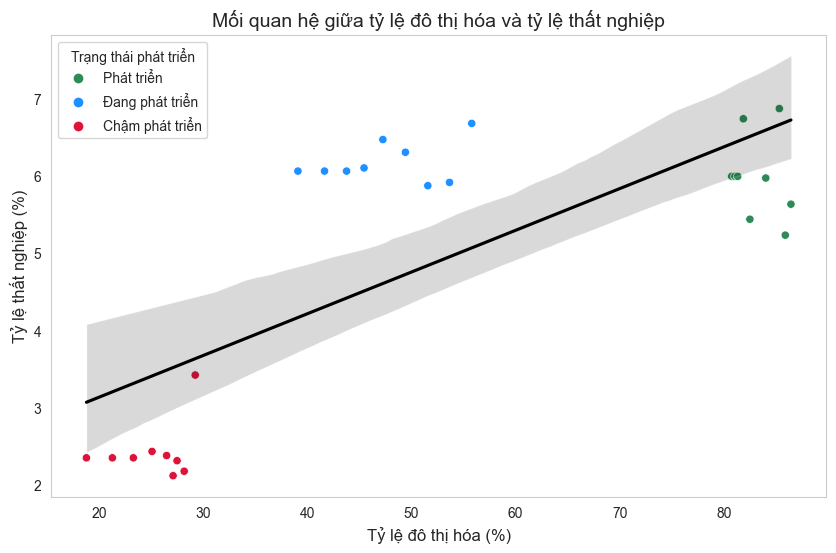

In [31]:

group_df_filtered = group_df[group_df['Year'] % 5 == 0]
# Định nghĩa bảng màu rõ ràng hơn
palette = {
    0: '#2E8B57',  # Xanh lá đậm - Phát triển
    1: '#1E90FF',  # Xanh dương - Đang phát triển
    2: '#DC143C'   # Đỏ - Chậm phát triển
}

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
sns.scatterplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)',  # Tỷ lệ đô thị hóa
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)',  # Tỷ lệ thất nghiệp
    hue='Development_Status',  # Phân loại theo trạng thái phát triển
    palette=palette  # Áp dụng bảng màu mới
)

# Thêm đường hồi quy để xem xu hướng chung
sns.regplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)', 
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)', 
    scatter=False,  # Không hiển thị các điểm dữ liệu
    color='black'  # Màu của đường hồi quy
)

# Định dạng biểu đồ
plt.title('Mối quan hệ giữa tỷ lệ đô thị hóa và tỷ lệ thất nghiệp', fontsize=14)
plt.xlabel('Tỷ lệ đô thị hóa (%)', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)

# Cập nhật chú thích để khớp với bảng màu
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Phát triển', 'Đang phát triển', 'Chậm phát triển'], title='Trạng thái phát triển')

plt.grid()
plt.show()

Kỳ - Câu 2:

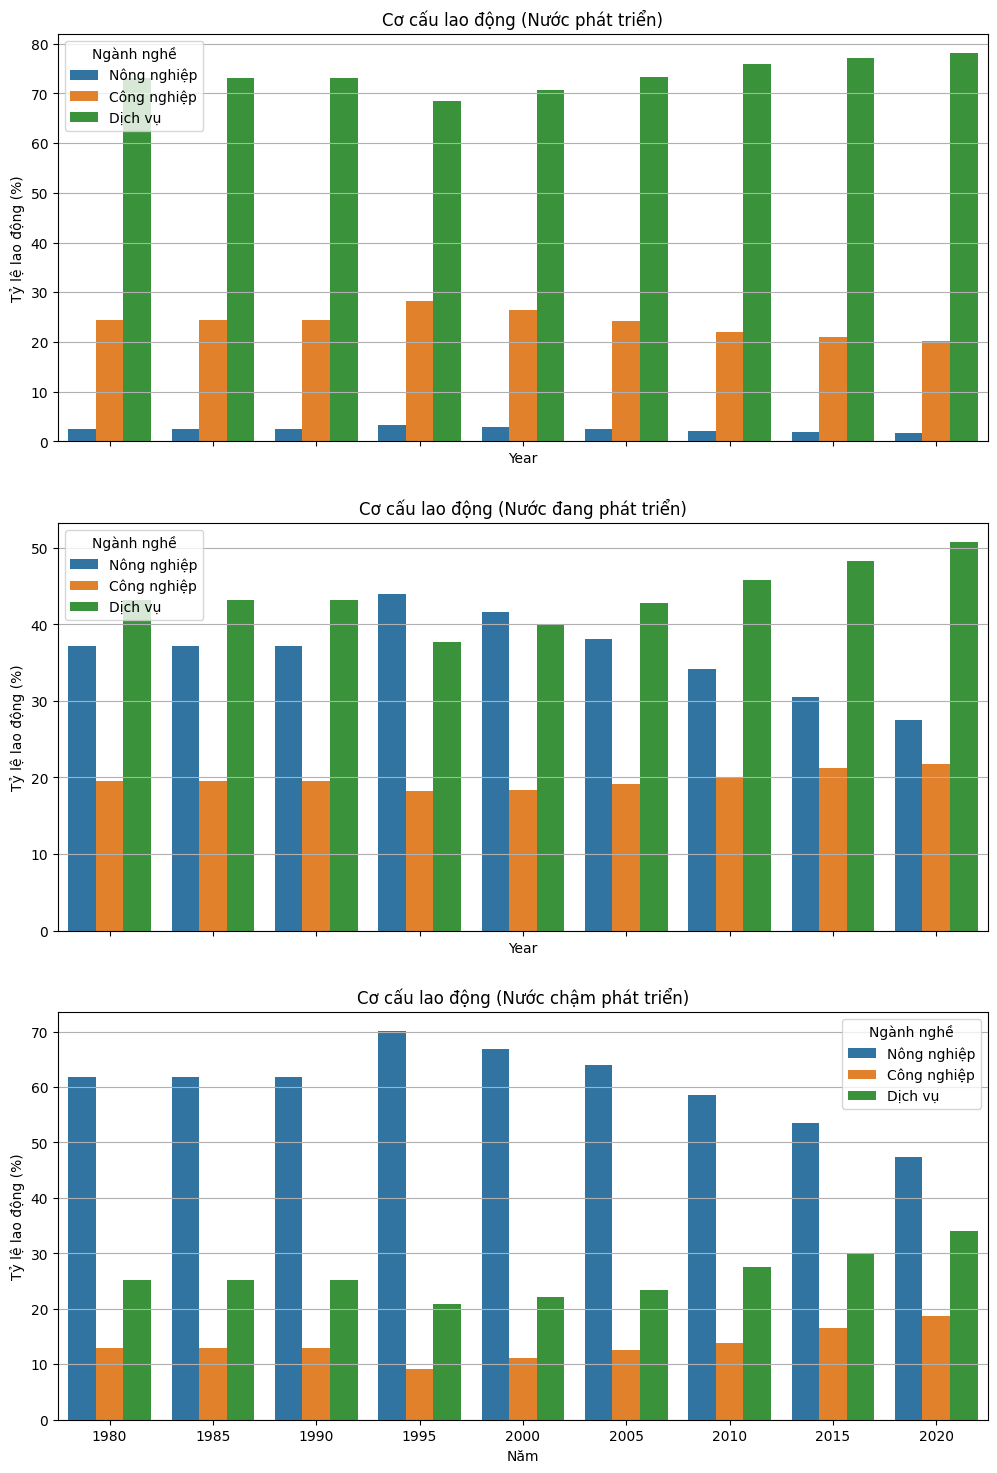

In [ ]:


development_groups = {
    0 : 'Nước phát triển',
    1 : 'Nước đang phát triển',
    2 : 'Nước chậm phát triển'
}

# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Chuyển đổi dữ liệu sang dạng phù hợp cho biểu đồ cột nhóm
    subset_melted = subset.melt(id_vars=['Year'], 
                                value_vars=['Employment in agriculture (% of total employment) (modeled ILO estimate)',
                                            'Employment in industry (% of total employment) (modeled ILO estimate)',
                                            'Employment in services (% of total employment) (modeled ILO estimate)'],
                                var_name='Ngành nghề', 
                                value_name='Tỷ lệ lao động')

    # Đổi tên ngành nghề để dễ đọc
    subset_melted['Ngành nghề'] = subset_melted['Ngành nghề'].replace({
        'Employment in agriculture (% of total employment) (modeled ILO estimate)': 'Nông nghiệp',
        'Employment in industry (% of total employment) (modeled ILO estimate)': 'Công nghiệp',
        'Employment in services (% of total employment) (modeled ILO estimate)': 'Dịch vụ'
    })

    # Vẽ biểu đồ cột nhóm
    sns.barplot(data=subset_melted, x='Year', y='Tỷ lệ lao động', hue='Ngành nghề', ax=axes[i])

    # Cài đặt tiêu đề và nhãn
    axes[i].set_title(f'Cơ cấu lao động ({title})')
    axes[i].set_ylabel('Tỷ lệ lao động (%)')
    axes[i].legend(title='Ngành nghề')
    axes[i].grid(axis='y')

# Cài đặt nhãn trục X cho subplot cuối cùng
axes[-1].set_xlabel('Năm')

# Hiển thị biểu đồ
plt.show()



c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

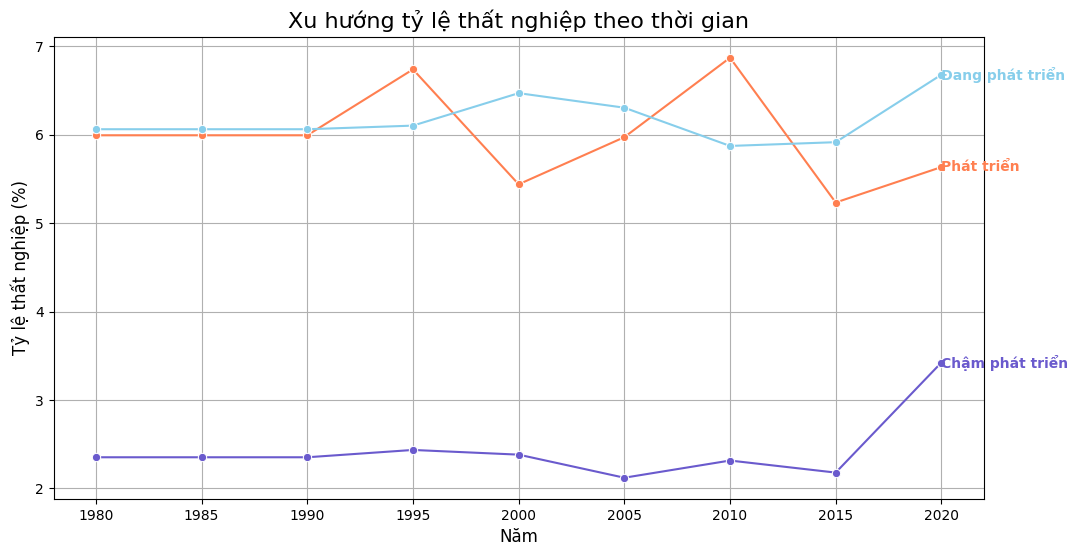

In [17]:
plt.figure(figsize=(12, 6))

# Tạo một bảng màu dễ phân biệt
palette = {
    'Phát triển': '#FF7F50',     # Màu cam
    'Đang phát triển': '#87CEEB', # Màu xanh dương nhạt
    'Chậm phát triển': '#6A5ACD'  # Màu tím
}

# Vẽ biểu đồ cho từng trạng thái phát triển
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == 0 else ('Đang phát triển' if status == 1 else 'Chậm phát triển')
    sns.lineplot(data=data, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', label=label, marker='o', color=palette[label])

# Thêm nhãn trực tiếp vào từng đường
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == 0 else ('Đang phát triển' if status == 1 else 'Chậm phát triển')
    plt.text(data['Year'].iloc[-1], data['Unemployment, total (% of total labor force) (modeled ILO estimate)'].iloc[-1], label, 
             color=palette[label], fontsize=10, weight='bold', va='center')

# Định dạng biểu đồ
plt.title('Xu hướng tỷ lệ thất nghiệp theo thời gian', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.grid()

# Loại bỏ chú thích (nếu đã gắn nhãn trực tiếp trên đường)
plt.legend().remove()

# Hiển thị biểu đồ
plt.show()


Kỳ - Câu 3

<Figure size 1400x600 with 0 Axes>

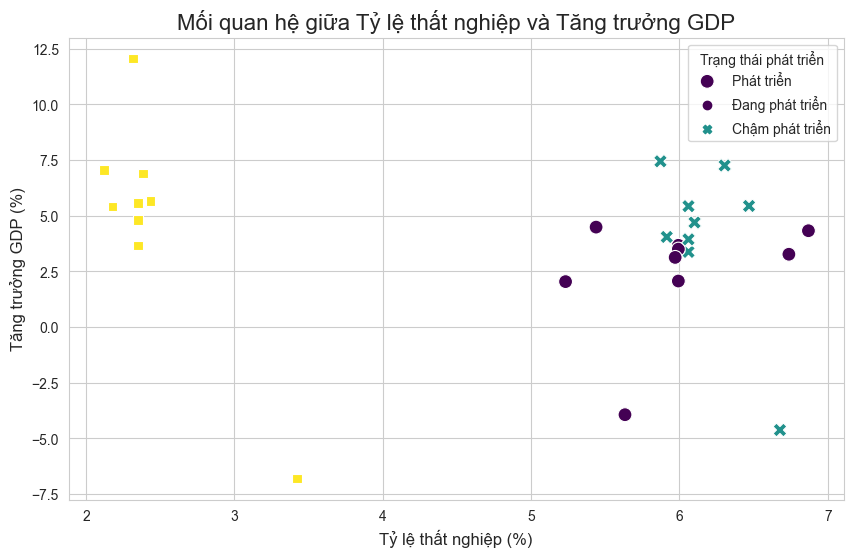

In [27]:
# Thiết lập kích thước và style chung
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# --- Biểu đồ phân tán: Mối quan hệ giữa tỷ lệ thất nghiệp và tăng trưởng GDP ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=group_df_filtered, x='Unemployment, total (% of total labor force) (modeled ILO estimate)', y='GDP growth (annual %)', hue='Development_Status', style='Development_Status', s=100, palette='viridis')
plt.title('Mối quan hệ giữa Tỷ lệ thất nghiệp và Tăng trưởng GDP', fontsize=16)
plt.xlabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.ylabel('Tăng trưởng GDP (%)', fontsize=12)
plt.legend(title='Trạng thái phát triển', labels=['Phát triển', 'Đang phát triển', 'Chậm phát triển'])
plt.show()





c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x600 with 0 Axes>

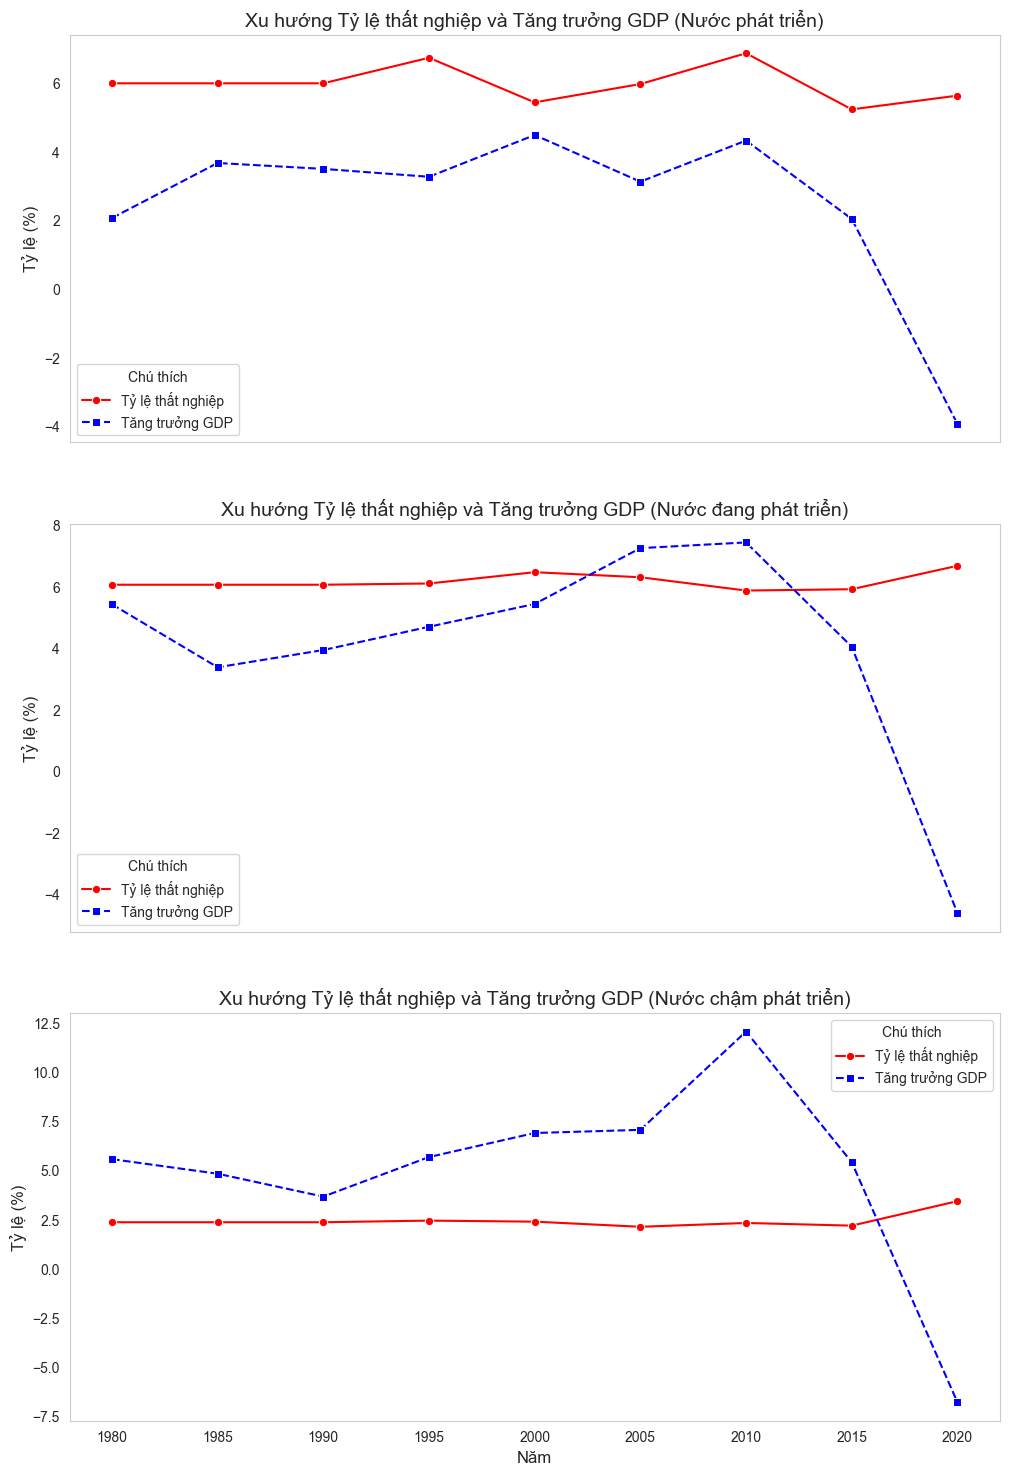

In [28]:
# --- Biểu đồ đường: Xu hướng thất nghiệp và tăng trưởng GDP theo thời gian ---
plt.figure(figsize=(12, 6))


# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Vẽ biểu đồ đường cho Tỷ lệ thất nghiệp
    sns.lineplot(data=subset, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)',
                 label='Tỷ lệ thất nghiệp', marker='o', color='red', ax=axes[i])

    # Vẽ biểu đồ đường cho Tăng trưởng GDP
    sns.lineplot(data=subset, x='Year', y='GDP growth (annual %)',
                 label='Tăng trưởng GDP', marker='s', linestyle='--', color='blue', ax=axes[i])

    # Định dạng biểu đồ
    axes[i].set_title(f'Xu hướng Tỷ lệ thất nghiệp và Tăng trưởng GDP ({title})', fontsize=14)
    axes[i].set_ylabel('Tỷ lệ (%)', fontsize=12)
    axes[i].legend(title='Chú thích', fontsize=10)
    axes[i].grid()

# Cài đặt nhãn trục X cho subplot cuối cùng
axes[-1].set_xlabel('Năm', fontsize=12)

# Hiển thị biểu đồ
plt.show()

## **Khánh** 

In [2]:
df = pd.read_csv("processed_data.csv")
df

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Development_Status
0,2020,Australia,25649248,12922405,12726843,11.500,6.300,1.328414e+12,6.456000,86.241,24.026739,20.637717,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,0
1,2019,Australia,25334826,12762303,12572523,12.100,6.700,1.392724e+12,5.159000,86.124,24.159678,22.027824,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,0
2,2018,Australia,24963258,12575335,12387923,12.600,6.300,1.427809e+12,5.300000,86.012,21.894091,21.841975,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,0
3,2017,Australia,24592588,12390298,12202290,12.600,6.500,1.325583e+12,5.592000,85.904,21.256617,20.947114,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,0
4,2016,Australia,24190907,12185876,12005031,12.900,6.600,1.206837e+12,5.711000,85.800,19.278744,21.695335,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1984,Zimbabwe,8391488,4282570,4108918,43.413,8.910,6.352126e+09,2.351978,24.736,20.561138,20.804997,-1.907360,6.288552,6.083,61.859283,12.876193,25.264525,2
1144,1983,Zimbabwe,8098404,4130412,3967992,45.119,9.442,7.764067e+09,2.351978,24.069,16.442925,19.473930,1.585305,6.494284,6.246,61.859283,12.876193,25.264525,2
1145,1982,Zimbabwe,7796496,3980628,3815868,45.918,9.776,8.539701e+09,2.351978,23.429,16.925580,22.219708,2.634297,6.200968,6.382,61.859283,12.876193,25.264525,2
1146,1981,Zimbabwe,7498635,3836536,3662099,46.494,10.122,8.011374e+09,2.351978,22.895,19.425226,25.905417,12.525425,8.608049,6.511,61.859283,12.876193,25.264525,2


### **Q1: Tỉ lệ sinh và tử vong ở các nhóm quốc gia (0,1,2) từ 1980-2020**

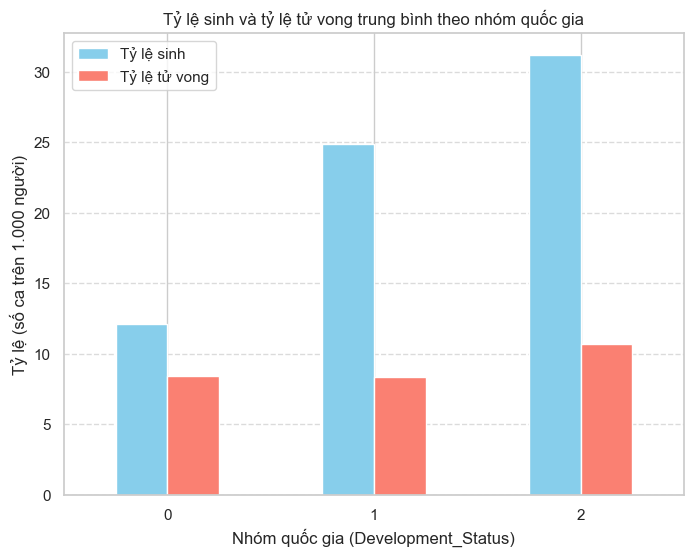

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Lọc các cột cần thiết
df_filtered = df[['Development_Status', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)']]

# Đổi tên cột
df_filtered.columns = ['Development Status', 'Birth Rate', 'Death Rate']

# Tính trung bình theo từng nhóm Development Status
df_grouped = df_filtered.groupby('Development Status').mean()

# Vẽ biểu đồ cột đôi
df_grouped.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

plt.title("Tỷ lệ sinh và tỷ lệ tử vong trung bình theo nhóm quốc gia")
plt.xlabel("Nhóm quốc gia (Development_Status)")
plt.ylabel("Tỷ lệ (số ca trên 1.000 người)")
plt.xticks(rotation=0)  # Giữ nhãn trục x ngang
plt.legend(["Tỷ lệ sinh", "Tỷ lệ tử vong"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

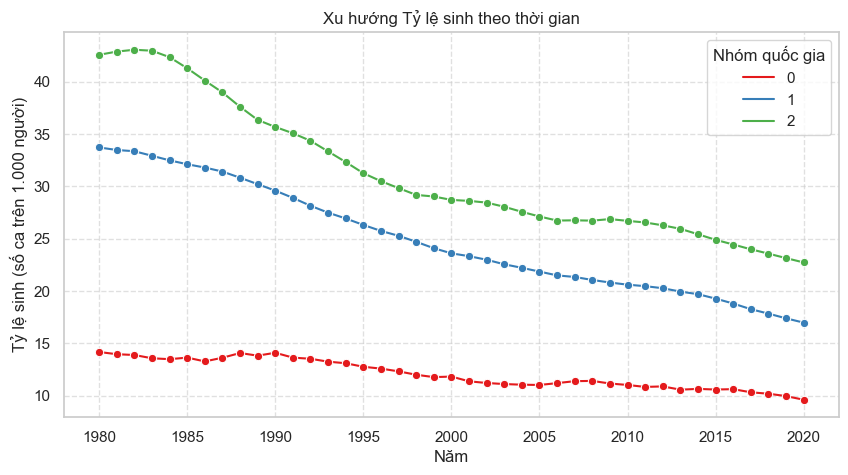

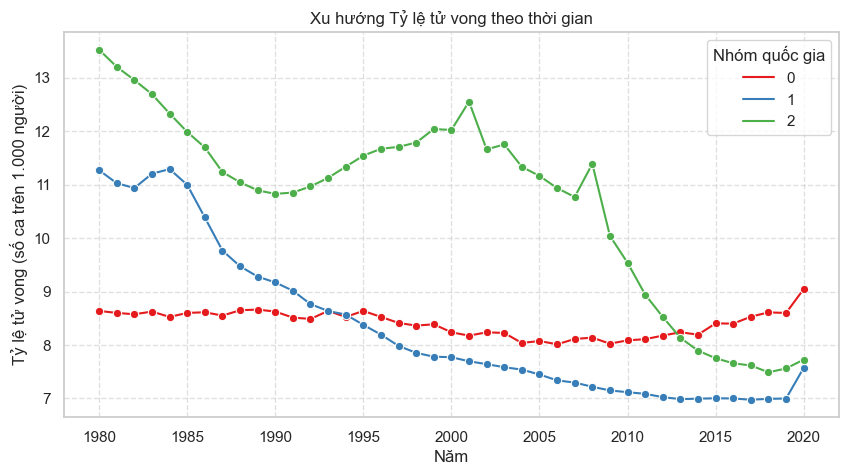

In [6]:

df_filtered = df[['Year', 'Development_Status', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)']]
df_filtered.columns = ['Year', 'Development Status', 'Birth Rate', 'Death Rate']

df_grouped = df_filtered.groupby(['Year', 'Development Status']).mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Birth Rate', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ sinh theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ sinh (số ca trên 1.000 người)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Vẽ biểu đồ đường cho Tỷ lệ tử vong
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Death Rate', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ tử vong theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ tử vong (số ca trên 1.000 người)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Hiển thị
plt.show()


### **Q2 :Phân tích Phân tích Cơ cấu Lao động ngành Nông nghiệp - Công nghiệp - Dịch vụ theo nhóm quốc gia trong giai đoạn 1980-2020**

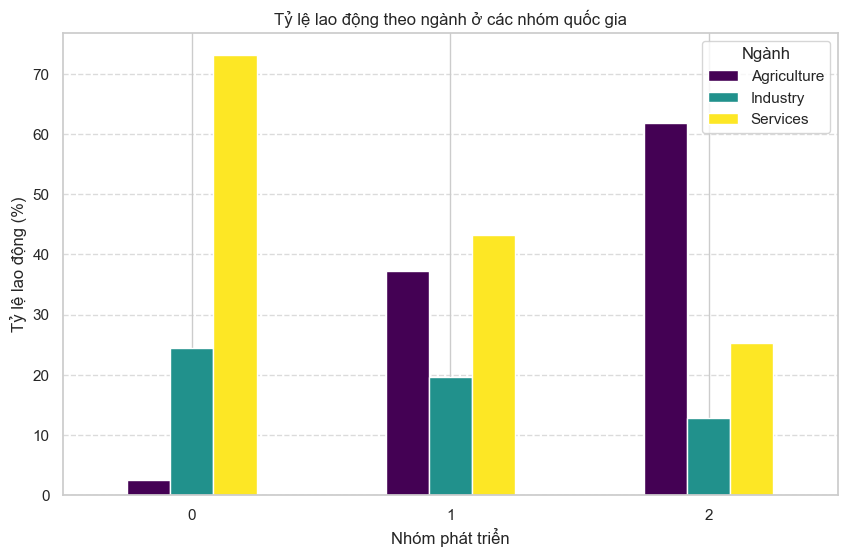

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đổi tên cột cho dễ đọc
df_renamed = df.rename(columns={
    "Employment in agriculture (% of total employment) (modeled ILO estimate)": "Agriculture",
    "Employment in industry (% of total employment) (modeled ILO estimate)": "Industry",
    "Employment in services (% of total employment) (modeled ILO estimate)": "Services"
})

# Tính trung bình theo nhóm quốc gia
df_grouped = df_renamed.groupby("Development_Status")[["Agriculture", "Industry", "Services"]].mean()

# Vẽ biểu đồ cột
df_grouped.plot(kind="bar", figsize=(10, 6), colormap="viridis")

plt.title("Tỷ lệ lao động theo ngành ở các nhóm quốc gia")
plt.ylabel("Tỷ lệ lao động (%)")
plt.xlabel("Nhóm phát triển")
plt.xticks(rotation=0)
plt.legend(title="Ngành")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

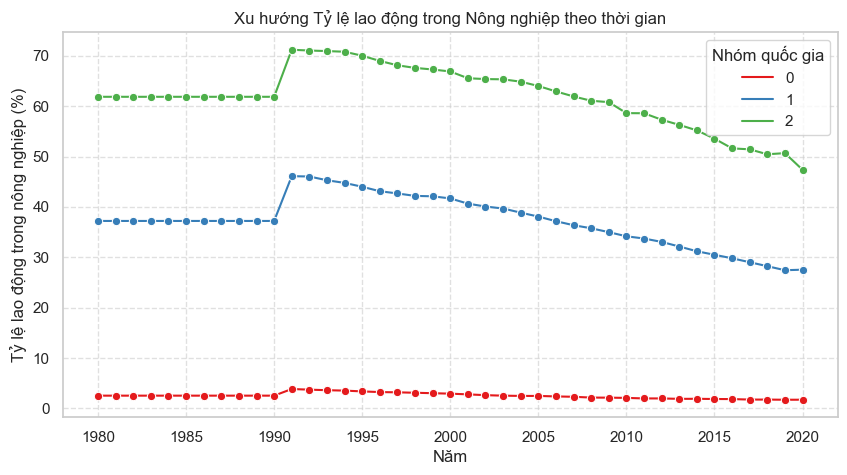

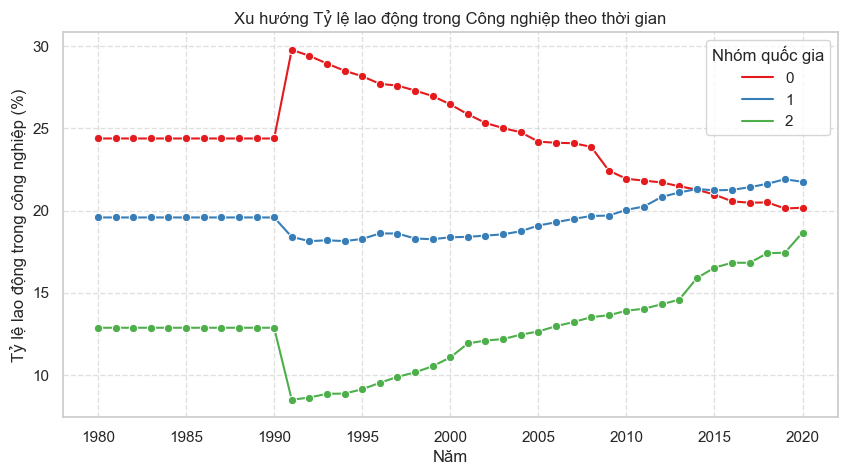

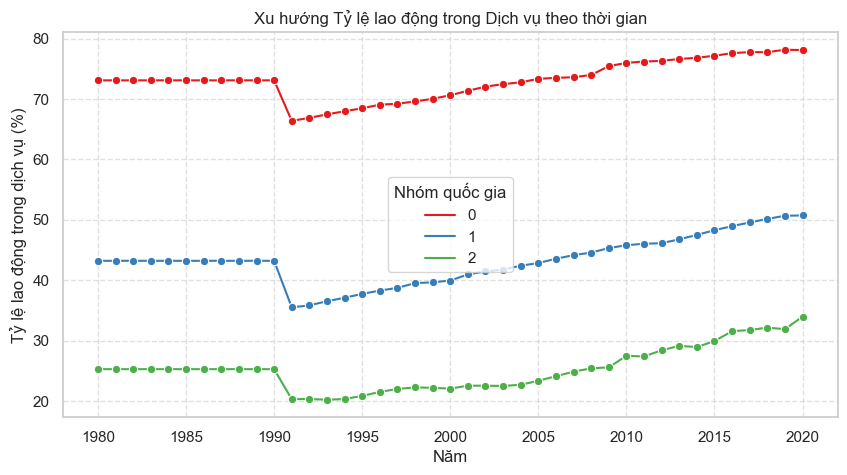

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn các cột cần thiết
df_filtered = df[['Year', 'Development_Status', 
                  'Employment in agriculture (% of total employment) (modeled ILO estimate)', 
                  'Employment in industry (% of total employment) (modeled ILO estimate)', 
                  'Employment in services (% of total employment) (modeled ILO estimate)']]

# Đổi tên cột
df_filtered.columns = ['Year', 'Development Status', 'Agriculture', 'Industry', 'Services']

# Nhóm theo năm và nhóm phát triển, tính trung bình
df_grouped = df_filtered.groupby(['Year', 'Development Status']).mean().reset_index()

# Biểu đồ đường cho Nông nghiệp
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Agriculture', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Nông nghiệp theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong nông nghiệp (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Biểu đồ đường cho Công nghiệp
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Industry', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Công nghiệp theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong công nghiệp (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Biểu đồ đường cho Dịch vụ
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Services', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Dịch vụ theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong dịch vụ (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Hiển thị tất cả biểu đồ
plt.show()


### **Q3: Dự đoán "Bẫy thu nhập trung bình"**

**"Bẫy thu nhập trung bình"** (Middle-income trap) là hiện tượng khi một quốc gia đạt mức thu nhập trung bình nhưng không thể tiếp tục phát triển lên nhóm thu nhập cao. Các nước trong bẫy này có tốc độ tăng trưởng GDP chậm dần, không thể cạnh tranh về chi phí lao động với các nước nghèo hơn hoặc về công nghệ với các nước giàu hơn.

- Dấu hiệu của bẫy thu nhập trung bình:

✅ GDP trung bình (không quá cao, không quá thấp).

✅ Tốc độ tăng trưởng GDP suy giảm theo thời gian.

✅ Năng suất lao động không tăng đáng kể.

✅ Dịch chuyển cơ cấu kinh tế bị chậm (vẫn dựa vào nông nghiệp hoặc công nghiệp truyền thống thay vì công nghệ cao, dịch vụ).

C:\Users\phamn\AppData\Local\Temp\ipykernel_2868\3557359104.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1["distance_to_0"] = distances


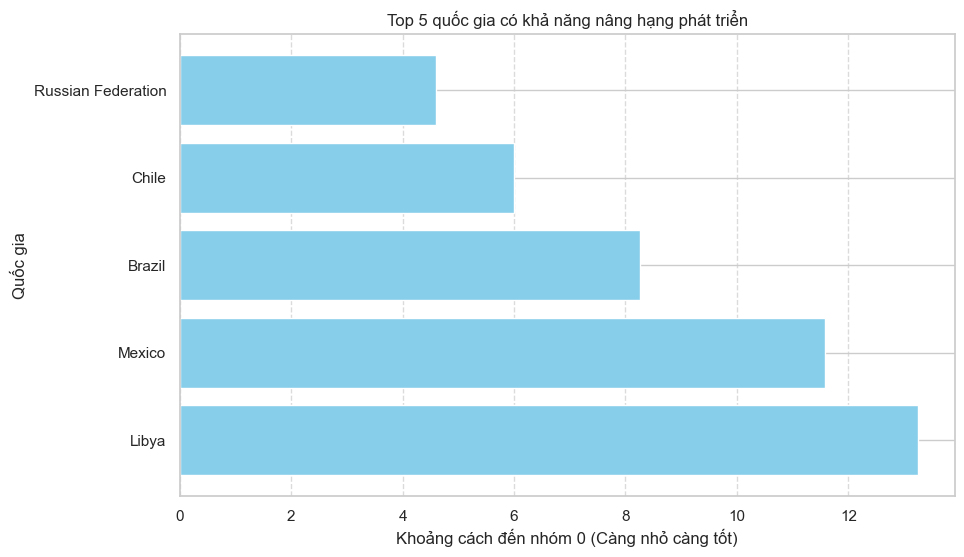

In [20]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors



# Chọn các cột quan trọng để phân tích
features = ["GDP (current US$)", "Urban population (% of total population)", 
            "Unemployment, total (% of total labor force) (modeled ILO estimate)", 
            "GDP growth (annual %)", "Employment in agriculture (% of total employment) (modeled ILO estimate)", "Employment in industry (% of total employment) (modeled ILO estimate)"
            ,"Employment in services (% of total employment) (modeled ILO estimate)"]

temp = df[df['Year'] == 2020]
# Lọc dữ liệu theo nhóm phát triển
group_0 = temp[temp["Development_Status"] == 0]
group_1 = temp[temp["Development_Status"] == 1]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_0 = scaler.fit_transform(group_0[features])
X_1 = scaler.transform(group_1[features])

# Áp dụng KNN để tìm khoảng cách từ nhóm 1 đến nhóm 0
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X_0)
distances, indices = knn.kneighbors(X_1)

# Gán khoảng cách vào group_1 và sắp xếp theo khoảng cách tăng dần
group_1["distance_to_0"] = distances
top_candidates = group_1.sort_values(by="distance_to_0").head(5)  # Chọn top 10 nước gần nhóm 0 nhất

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_candidates["Country"][::-1], top_candidates["distance_to_0"][::-1], color='skyblue')

# Gắn nhãn
plt.xlabel("Khoảng cách đến nhóm 0 (Càng nhỏ càng tốt)")
plt.ylabel("Quốc gia")
plt.title("Top 5 quốc gia có khả năng nâng hạng phát triển")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()
